In [222]:
import json
import requests
import pandas as pd
from pprint import pprint

In [223]:
FASTAPI = 'http://172.27.0.12:8080'
TABLES_URL = FASTAPI + '/api/tower-analytics/v1/tables'
SQL_URL = FASTAPI + '/api/tower-analytics/v1/sql'

In [224]:
rr = requests.get(TABLES_URL)
tables = rr.json()

In [225]:
print(json.dumps(sorted(set([x['table'] for x in tables])), indent=2))

[
  "cluster",
  "cluster_info",
  "cluster_system",
  "daily_event_explorer_rollup",
  "daily_job_explorer_rollup",
  "daily_job_failed_step_rollup",
  "daily_unique_hosts_rollup",
  "deprecations",
  "event_explorer_rollup",
  "host",
  "host_event_explorer_rollup",
  "host_explorer_rollup",
  "job",
  "job_events_fk",
  "job_explorer_rollup",
  "job_failed_step_rollup",
  "migrations",
  "monthly_job_explorer_rollup",
  "notification",
  "notification_arg",
  "notification_code",
  "notification_severity",
  "notification_type",
  "organization",
  "play",
  "playbook",
  "role",
  "rollup_jobs",
  "system",
  "system_info",
  "task",
  "task_action",
  "unified_jobs_fk",
  "warnings",
  "workflow_job_nodes",
  "yearly_job_explorer_rollup"
]


In [226]:
rr = requests.post(SQL_URL, json={'query': 'select * from cluster'})
pprint(rr.json())

[{'cluster_id': 1,
  'install_uuid': 'ba8dbb23-c19d-4aef-a668-c971f4170b43',
  'label': 'ec2-52-90-106-58.compute-1.amazonaws.com',
  'url_base': 'https://ec2-52-90-106-58.compute-1.amazonaws.com'},
 {'cluster_id': 2,
  'install_uuid': '018dbb23-c19d-4aef-a668-c971f4170b43',
  'label': 'ec2-52-90-106-01.compute-1.amazonaws.com',
  'url_base': 'https://ec2-52-90-106-01.compute-1.amazonaws.com'},
 {'cluster_id': 3,
  'install_uuid': '108dbb23-c19d-4aef-a668-c971f4170b43',
  'label': 'ec2-52-90-106-02.compute-1.amazonaws.com',
  'url_base': 'https://ec2-52-90-106-02.compute-1.amazonaws.com'},
 {'cluster_id': 4,
  'install_uuid': 'c3256bdf-d5c7-421b-9882-f728c2ea8e23',
  'label': '192.168.122.85',
  'url_base': 'https://192.168.122.85'}]


In [234]:
sql = 'select * from job_events_fk where cluster_id=4 limit 2'
rr = requests.post(SQL_URL, json={'query': sql})
pprint(rr.json())

[{'changed': False,
  'cluster_id': 4,
  'created': '2020-11-12T17:46:17.322752',
  'deprecations': None,
  'duration': 0.0,
  'end': None,
  'event': 'runner_on_start',
  'failed': False,
  'host_id': 45,
  'host_name': 2072,
  'id': 45650,
  'job_id': 9,
  'parent_uuid': '52540073-be9c-5b0a-b3df-000000000073',
  'play': 1,
  'playbook': 1,
  'role': None,
  'start': None,
  'system_id': 13,
  'task': 107,
  'task_action': 105,
  'uuid': 'd5f66086-1596-49ee-982f-247e97a6d0da',
  'warnings': None},
 {'changed': False,
  'cluster_id': 4,
  'created': '2020-11-12T17:46:17.350356',
  'deprecations': None,
  'duration': 0.0,
  'end': None,
  'event': 'verbose',
  'failed': False,
  'host_id': None,
  'host_name': None,
  'id': 45651,
  'job_id': 9,
  'parent_uuid': '52540073-be9c-5b0a-b3df-000000000073',
  'play': 1,
  'playbook': 1,
  'role': None,
  'start': None,
  'system_id': 13,
  'task': 107,
  'task_action': 105,
  'uuid': 'dfb65c56-5521-40f7-b30b-e440388e28c6',
  'warnings': None}

In [227]:
#print([json.dumps(x, indent=2) for x in tables if x['table'] == 'job_events_fk'])
sql = 'select DISTINCT(host_id) from job_events_fk where cluster_id=4'
#sql = 'select DISTINCT(host_name) from job_events_fk'
rr = requests.post(SQL_URL, json={'query': sql})
hostnames = [x['host_id'] for x in rr.json()]
print(json.dumps(hostnames[:10], indent=2))

[
  null,
  51,
  70,
  42,
  57,
  19,
  91,
  10,
  50,
  13
]


In [238]:
host_sums = []
for hid in hostnames:
    if not hn:
        continue
    sql = f"SELECT SUM(duration) FROM job_events_fk WHERE host_id='{hid}' AND duration > 0"
    #print(sql)
    try:
        rr = requests.post(SQL_URL, json={'query': sql})
        #print(rr.reason)
        #print(json.dumps(rr.json(), indent=2))
        host_sums.append({'host_id': hid, 'duration': rr.json()[0]['sum']})
    except Exception as e:
        pass
pprint(sorted(host_sums, key=lambda x: x['duration'], reverse=True))

[{'duration': 27.442985, 'host_id': 52},
 {'duration': 14.8859, 'host_id': 102},
 {'duration': 14.548847, 'host_id': 26},
 {'duration': 14.148053, 'host_id': 78},
 {'duration': 14.015529, 'host_id': 94},
 {'duration': 13.992734, 'host_id': 37},
 {'duration': 13.977316, 'host_id': 74},
 {'duration': 13.870422, 'host_id': 72},
 {'duration': 13.810135, 'host_id': 62},
 {'duration': 13.716035, 'host_id': 36},
 {'duration': 13.652778, 'host_id': 60},
 {'duration': 13.60205, 'host_id': 21},
 {'duration': 13.56526, 'host_id': 95},
 {'duration': 13.449423, 'host_id': 63},
 {'duration': 13.167142, 'host_id': 68},
 {'duration': 12.945079, 'host_id': 89},
 {'duration': 12.911042, 'host_id': 29},
 {'duration': 12.811606, 'host_id': 35},
 {'duration': 12.809872, 'host_id': 9},
 {'duration': 12.559957, 'host_id': 54},
 {'duration': 12.500062, 'host_id': 2},
 {'duration': 12.422022, 'host_id': 100},
 {'duration': 12.377193, 'host_id': 58},
 {'duration': 12.230631, 'host_id': 22},
 {'duration': 12.205

In [236]:
df = pd.DataFrame.from_records(host_sums)
df.fillna(0)

,host_id,duration
0,51,6.654027
1,70,5.164987
2,42,4.695766
3,57,9.723879
4,19,5.429178
...,...,...
96,17,6.325616
97,83,6.035516
98,63,13.449423
99,16,11.999465


<AxesSubplot:ylabel='Frequency'>

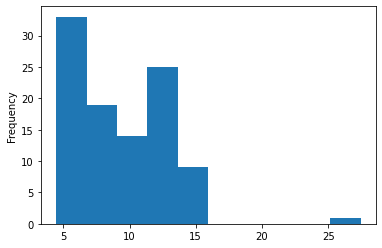

In [237]:
df['duration'].plot(kind='hist')